In [1]:
!pip install -r ../pycjs/requirements.txt

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import os
import sys

cur_dir = os.getcwd()
pkg_rootdir = os.path.dirname(cur_dir)  # *注意改为项目自定义包的根路径
# print(pkg_rootdir)
if pkg_rootdir not in sys.path:  # 解决ipynb引用上层路径中的模块时的ModuleNotFoundError问题
    sys.path.append(pkg_rootdir)
    print('-- Add root directory "{}" to system path.'.format(pkg_rootdir))

-- Add root directory "/home/node/notebook" to system path.


In [3]:
import copy
import pandas as pd

from node_vm2 import NodeVM

from pycjs.open_digger import vm_option_open_digger, get_export_module_open_digger
from pycjs.vm_context_manager import VMContext
from pycjs.metrics import MultiMime

/home/node/.local/lib/python3.8/site-packages/node_vm2/__init__.py:17: FutureWarning: node_vm2 is deprecated. Please use deno_vm instead.
  warnings.warn("node_vm2 is deprecated. Please use deno_vm instead.", FutureWarning)


In [4]:
year = 2023
startYear = 2019
endYear = year
startMonth = 1
endMonth = 12
years = [i + startYear for i in range(5)]
baseOptions = {
   "startYear": startYear,
   "endYear": endYear,
   "startMonth": startMonth,
   "endMonth": endMonth,
   "groupTimeRange": 'year',
   "order": 'DESC'
}

localOptions = {
   "limit": 10
}

options = copy.deepcopy(baseOptions)
options.update(localOptions)

In [5]:
# use context manager 'with'
with NodeVM(**vm_option_open_digger) as vm:
    # set show_indexes=True to display functions in the export module.
    export_module = get_export_module_open_digger(vm, show_indexes=False)
    openDigger = export_module.openDigger
    data_repo_openrank = openDigger.index.openrank.getRepoOpenrank(options)
    df_data_repo_openrank = pd.DataFrame(list(data_repo_openrank))

df_data_repo_openrank

,id,platform,name,openrank
0,4542716,GitHub,NixOS/nixpkgs,"[10178.42, 12807.93, 16484.33, 18068.7, 22368.27]"
1,12888993,GitHub,home-assistant/core,"[7694.14, 10329.19, 11668.2, 14196.43, 15681.98]"
2,41881900,GitHub,microsoft/vscode,"[11551.64, 12556.42, 12051.88, 12239.15, 13271..."
3,72685026,GitHub,MicrosoftDocs/azure-docs,"[15179.16, 15635.02, 12386.24, 11419.23, 10400..."
4,65600975,GitHub,pytorch/pytorch,"[7157.69, 8648.41, 8850.87, 8058.33, 10182.45]"
5,15634981,GitHub,godotengine/godot,"[5848.35, 5919.27, 6159.23, 7556.08, 9906.06]"
6,31792824,GitHub,flutter/flutter,"[11750.07, 15945.87, 13022, 10033.56, 9367.81]"
7,19745004,GitHub,odoo/odoo,"[5106.76, 5544.93, 5518.5, 7004.32, 9325.34]"
8,632909818,GitHub,elidianaandrade/dio-lab-open-source,"[0, 0, 0, 0, 8447.2]"
9,197275551,GitHub,microsoft/winget-pkgs,"[0, 1409.37, 3971.84, 5729.5, 8269.27]"


In [6]:
with NodeVM(**vm_option_open_digger) as vm:
    # set show_indexes=True to display functions in the export module.
    df_options = {
        "max_colwidth": 60,
        # "rows": range(40),
        "columns": ["export_indexes"],
        # "apply_func": {"func": lambda x: sum([len(x_elem) for x_elem in x]) < 25, "axis": 1}
        }
    get_export_module_open_digger(vm, show_indexes=True, df_options=df_options)

                                              export_indexes
0                              openDigger.label.getLabelData
1                           openDigger.label.getPlatformData
2                                   openDigger.render.plotly
3                          openDigger.driver.neo4j.getClient
4                              openDigger.driver.neo4j.query
5                        openDigger.driver.neo4j.queryStream
6                        openDigger.driver.neo4j.parseRecord
7                  openDigger.driver.clickhouse.getNewClient
8                         openDigger.driver.clickhouse.query
9                   openDigger.driver.clickhouse.queryStream
10                openDigger.driver.clickhouse.insertRecords
11                 openDigger.index.activity.getRepoActivity
12                 openDigger.index.activity.getUserActivity
13       openDigger.index.activity.getRepoActivityWithDetail
14       openDigger.index.activity.getUserActivityWithDetail
15                 openD

In [7]:
# use vm_context_manager as a manual context manager
vmc = VMContext(**vm_option_open_digger)

In [8]:
vmc.open()

In [9]:
vm = vmc.vm
export_module = get_export_module_open_digger(vm)
openDigger = export_module.openDigger

In [10]:
data_user_openrank = openDigger.index.openrank.getUserOpenrank(options)
pd.DataFrame(list(data_user_openrank))

,id,platform,name,openrank
0,1580956,GitHub,chenrui333,"[674.78, 1261.4, 1533.26, 988, 2039.17]"
1,663432,GitHub,bdraco,"[4.75, 777.74, 1040.31, 1654.06, 1898.51]"
2,116184,GitHub,fabaff,"[276.82, 207, 1144.26, 1208.32, 1679.7]"
3,105994585,GitHub,p-linnane,"[0, 0, 0, 1105.82, 1300.46]"
4,195327,GitHub,frenck,"[389.28, 918.57, 1739.47, 1559.47, 1210.99]"
5,26833433,GitHub,glenn-jocher,"[114.57, 371.08, 723.53, 737.96, 1205.96]"
6,55035720,GitHub,content-bot,"[23.08, 120.54, 580.66, 675.92, 1107.72]"
7,56779163,GitHub,SpecterShell,"[0, 0, 63.65, 440.1, 1103.59]"
8,79238446,GitHub,mssonicbld,"[0, 0, 56.12, 151.2, 1073.56]"
9,28706372,GitHub,danielroe,"[53.14, 127.23, 271.02, 674.22, 1034.67]"


In [11]:
def row_openrank_postprocess(row):
    years = [2019, 2020, 2021, 2022, 2023]
    return {
        "x": years,
        "y": row["openrank"],
        "name": row["name"]
    }

def processTechFieldRepoOpenrank(options, title):
    data = openDigger.index.openrank.getRepoOpenrank(
        dict(baseOptions, 
             **dict(options)
            )
    )
    data_records = pd.DataFrame(data).apply(row_openrank_postprocess, axis=1).values.tolist()
    openDigger.render.plotly(
        data_records,
        {"title": f"Top 10 OpenRank repositories of {title} 2019-2023"},
        MultiMime()
    )

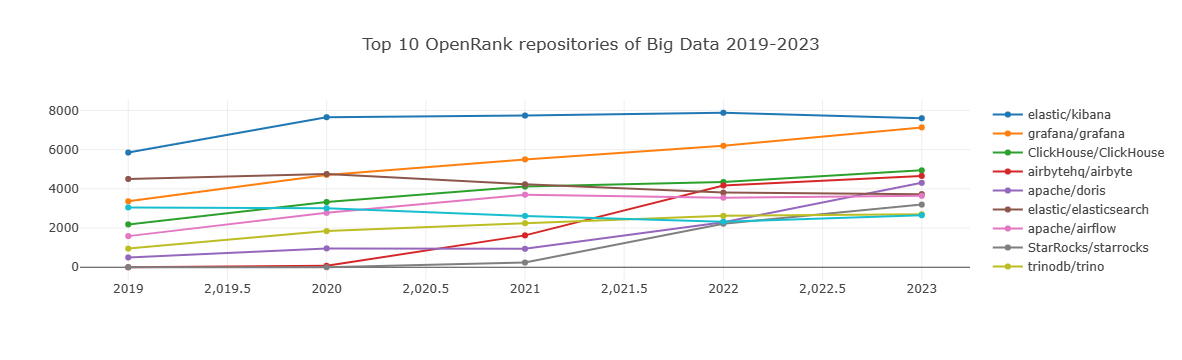

In [12]:
processTechFieldRepoOpenrank({"labelIntersect": [':technology/big_data']}, 'Big Data');

In [13]:
def row_activity_postprocess(row):
    years = [2019, 2020, 2021, 2022, 2023]
    return {
        "x": years,
        "y": row["activity"],
        "name": row["name"]
    }
def processTechFieldRepoActivity(options, title):
    data = openDigger.index.activity.getRepoActivity(
        dict(baseOptions, 
             **dict(options)
            )
    )
    data_records = pd.DataFrame(data).apply(row_activity_postprocess, axis=1).values.tolist()
    openDigger.render.plotly(
        data_records, 
        {"title": f"Top 10 Activity repositories of {title} 2019-2023"},
        MultiMime()
    )

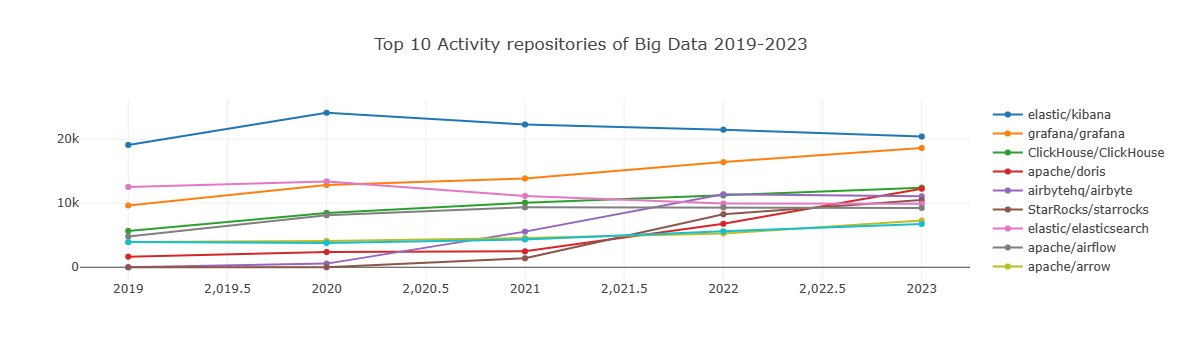

In [14]:
processTechFieldRepoActivity({"labelIntersect": [':technology/big_data']}, 'Big Data')

In [15]:
def activity_rank_postporcess(row):
    return {
        "x": [2019, 2020, 2021, 2022, 2023],
        "y": row["values"],
        "name": row["name"],
        "type": 'scatter'
    }
def processRegionsCompanyRepoActivity(options, title):
    data = openDigger.index.activity.getRepoActivity(dict({
        "startYear": startYear, "endYear": endYear, "startMonth": startMonth, "endMonth": endMonth,
        "groupBy": 'Company', "groupTimeRange": 'year', "order": 'DESC',
    }, **options))
    
    data_records = pd.DataFrame(data).to_dict('records')
    data_periodranks = openDigger.getRank(data_records, lambda x: x["name"], lambda x: x["activity"])
    
    data_periodranks_records = pd.DataFrame(data_periodranks).apply(activity_rank_postporcess, axis=1).values.tolist()
    openDigger.render.plotly(data_periodranks_records, {
        "title": f"{title}活跃度 Top 10 {startYear} - {year}", 
        "xaxis": { "type": 'category' }, 
        "yaxis": { "autorange": 'reversed', "dtick": 1 } 
    }, MultiMime())

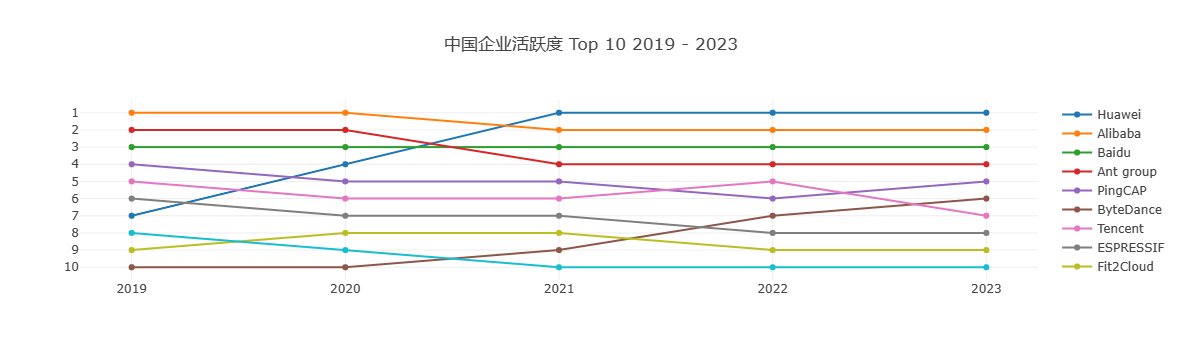

In [16]:
processRegionsCompanyRepoActivity({"labelIntersect": [':regions/CN', 'Company']}, "中国企业")

In [17]:
vmc.close()